- .to_csv('directory',index=False) : index필드 제외하고 생성
- 
- seaborn :  matplotlib 기반의 시각화 라이브러리 (dataset / graph 관련 Lib 제공)
- sns.get_dataset_names() : data set 목록
- titanic = sns.load_dataset('titanic') : dataset중 titanic을 load하여 titanic에 저장
- data.isnull().sum() : 공백 data를 차례로 개수와 함께 출력
- data['column'].value_count(): 중복되는 value와 그 개수
- data['column'].fillna(data['column'].meadian()) : 공백이 있는 곳에 평균값으로 채움
- 
- .info() : 각 column의 data type / .describe() : 통계 데이터 min/max/mean/std
- 
- sns.countplot(col, hue = col_re, data=) 'hue' option: 분류별로 결과를 볼 수 있음
- sns.pairplot(data, hue = col_re) : 각 column(변수)들의 모든 상관 관계를 출력
- sns.catplot(x='col1', y ='col_re', hue='col2', data=, kind=''): 숫자형 변수와 하나 이상의 categorical 변수의 관계
- sns.regplot(x='',y='',data=): scatter plot과 line plot을 함께 볼 수 있음 (lmplot: 여러개의 regplot)
-
- .corr(method='pearson') : 피어슨 상관계수를 적용하여 상관계수를 구함
- data[col1].corr(data[col2]): 두 변수(col1과 col2) 사이의 상관계수
- .apply(function) : 함수 적용
- .map({'col1'='val1', 'col2'='val2'}) : mapping

In [ ]:
# !pip install seaborn
# !pip install pandas

import seaborn as sns
import pandas as pd

In [12]:
sns.get_dataset_names() # seaborn 내장 dataset

['anagrams',
 'anscombe',
 'attention',
 'brain_networks',
 'car_crashes',
 'diamonds',
 'dots',
 'exercise',
 'flights',
 'fmri',
 'gammas',
 'geyser',
 'iris',
 'mpg',
 'penguins',
 'planets',
 'tips',
 'titanic']

In [81]:
titanic = sns.load_dataset('titanic')

In [82]:
titanic.to_csv('./data/titanic.csv', index=False) # index 필드(행번호) 제외하고 생성

In [83]:
titanic.isnull().sum()

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

In [84]:
titanic['age'] = titanic['age'].fillna(titanic['age'].median())

In [85]:
titanic['embarked'].value_counts()
titanic['embark_town'].value_counts()
titanic['deck'].value_counts()

C    59
B    47
D    33
E    32
A    15
F    13
G     4
Name: deck, dtype: int64

In [86]:
titanic['embarked'] = titanic['embarked'].fillna('S')
titanic['embark_town'] = titanic['embark_town'].fillna('Southampton')
titanic['deck'] = titanic['deck'].fillna('C')

In [87]:
titanic.info()
# sibsp : 함께 탑승한 형제자매와 배우자
# parch : 함께 탑승한 부모/자식의 수
# embarked(embark town) : 탑승 항구
# alone: 동행여부

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          891 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     891 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         891 non-null    category
 12  embark_town  891 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB


In [88]:
titanic.survived.value_counts()

0    549
1    342
Name: survived, dtype: int64

In [40]:
import matplotlib.pyplot as plt

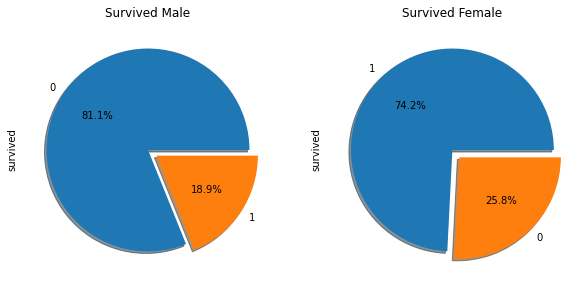

In [89]:
# Male / Female 생존율 
f,ax = plt.subplots(1,2,figsize=(10,5))
titanic['survived'][titanic['sex'] == 'male'].value_counts().plot.pie(explode=[0,0.1], autopct = '%1.1f%%', ax = ax[0], shadow=True)
titanic['survived'][titanic['sex'] == 'female'].value_counts().plot.pie(explode=[0,0.1], autopct = '%1.1f%%', ax = ax[1], shadow=True)
ax[0].set_title('Survived Male')
ax[1].set_title('Survived Female')
plt.show()

C:\developer\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


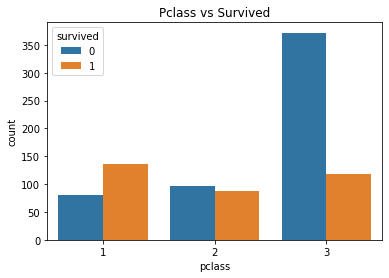

In [90]:
# 객실 등급별 생존자 수
# seaborn.countplot 사용
sns.countplot('pclass',hue='survived',data=titanic)
plt.title('Pclass vs Survived')
plt.show()

In [91]:
# 상관분석
titanic_corr = titanic.corr(method='pearson')
titanic_corr
titanic_corr.to_csv('data/titanic_corr.csv', index=False)

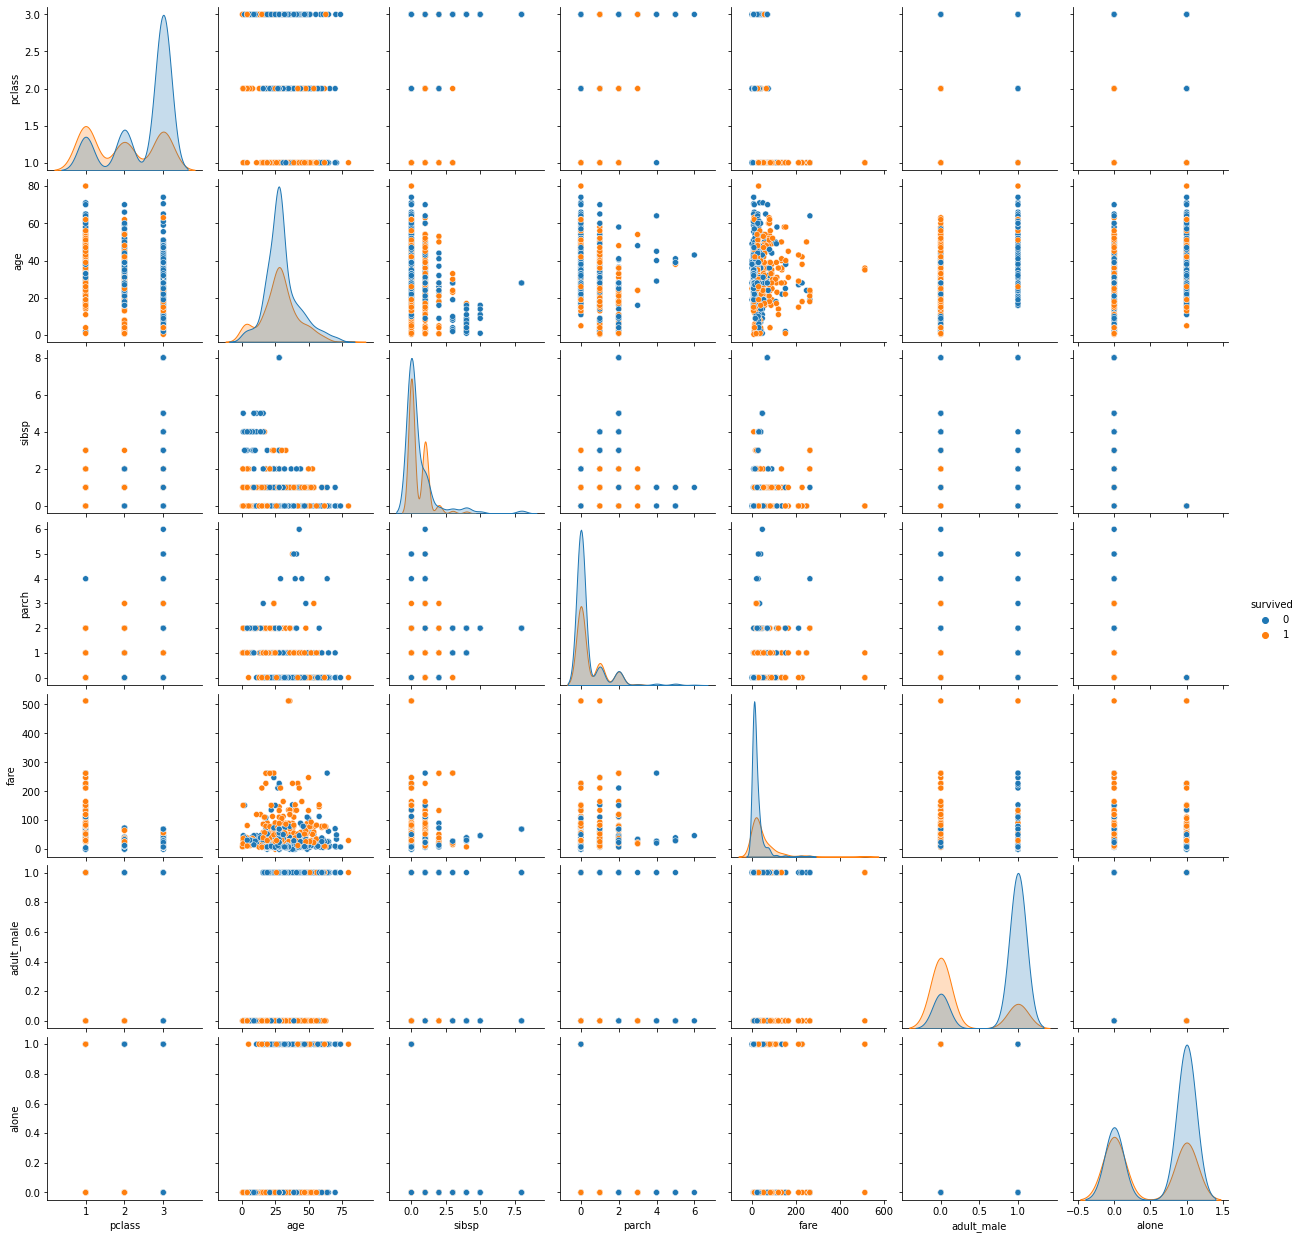

In [92]:
sns.pairplot(titanic,hue='survived')
plt.show()

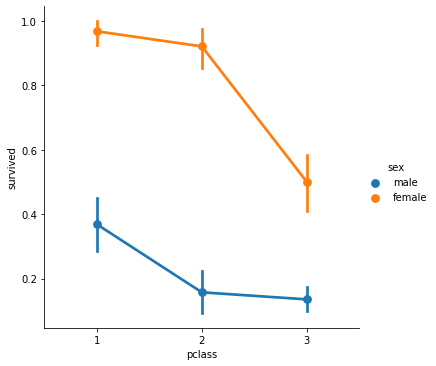

In [93]:
sns.catplot(x='pclass', y ='survived', hue='sex', data=titanic, kind = 'point')

In [66]:
def category_age(x):
    if x < 10:
        return 0
    elif x < 20:
        return 1
    elif x < 30:
        return 2
    elif x < 40:
        return 3
    elif x < 50:
        return 4
    elif x < 60:
        return 5
    elif x < 70:
        return 6
    else:
        return 7

In [94]:
titanic['age2'] = titanic.age.apply(category_age)
titanic['sex'] = titanic.sex.map({'male':1,'female':0})
titanic['family'] = titanic.sibsp + titanic.parch +1
titanic.to_csv('./data/titanic3.csv',index=False)

<AxesSubplot:>

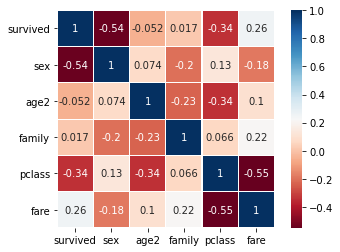

In [95]:
heatmap_data = titanic[['survived','sex','age2', 'family', 'pclass', 'fare']]
colormap = plt.cm.RdBu
sns.heatmap(heatmap_data.astype(float).corr(), linewidth=0.1, vmax=1.0, square=True, cmap=colormap, linecolor='white', annot=True, annot_kws={'size':10})